### Problem Statement :- Predicts the selling price of second-hand cars Using LinearRegression Machine learning algorithm. 

### 1) Import necessary libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



### 2) Load Dataset

In [103]:
data = pd.read_csv("car data.csv")

### About Dataset

This dataset contains information about used cars.

This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning. The columns in the given dataset are as follows:

1) name

2) year

3) selling_price

4) km_driven

5) fuel

6) seller_type

7) transmission

8) Owner

In [104]:
data.head() # checking the first five rows from the dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [105]:
data.tail()   #check last 5 rows

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [106]:
data.shape ## printing the no. of columns and rows of the dataframe

(301, 9)

In [107]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [108]:
data.isnull().sum()

# finding the count of missing values from different columns

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [110]:
data.describe() # Statistical Information 

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Now the data looks good and there are no missing values. Also, the first cloumn is just Car_Name, so we don' need that column. Let's drop it from data and make it more clean.

In [111]:
data= data.drop(columns = ['Car_Name'])


In [112]:
data.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Let's visualize the data and analyze the relationship between independent and dependent variables:

In [113]:
Categorical_features = [col for col in data.columns if data[col].dtype == 'O']
Categorical_features

['Fuel_Type', 'Seller_Type', 'Transmission']

In [114]:
numerical_features = [col for col in data.columns if data[col].dtype != 'O']
numerical_features

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

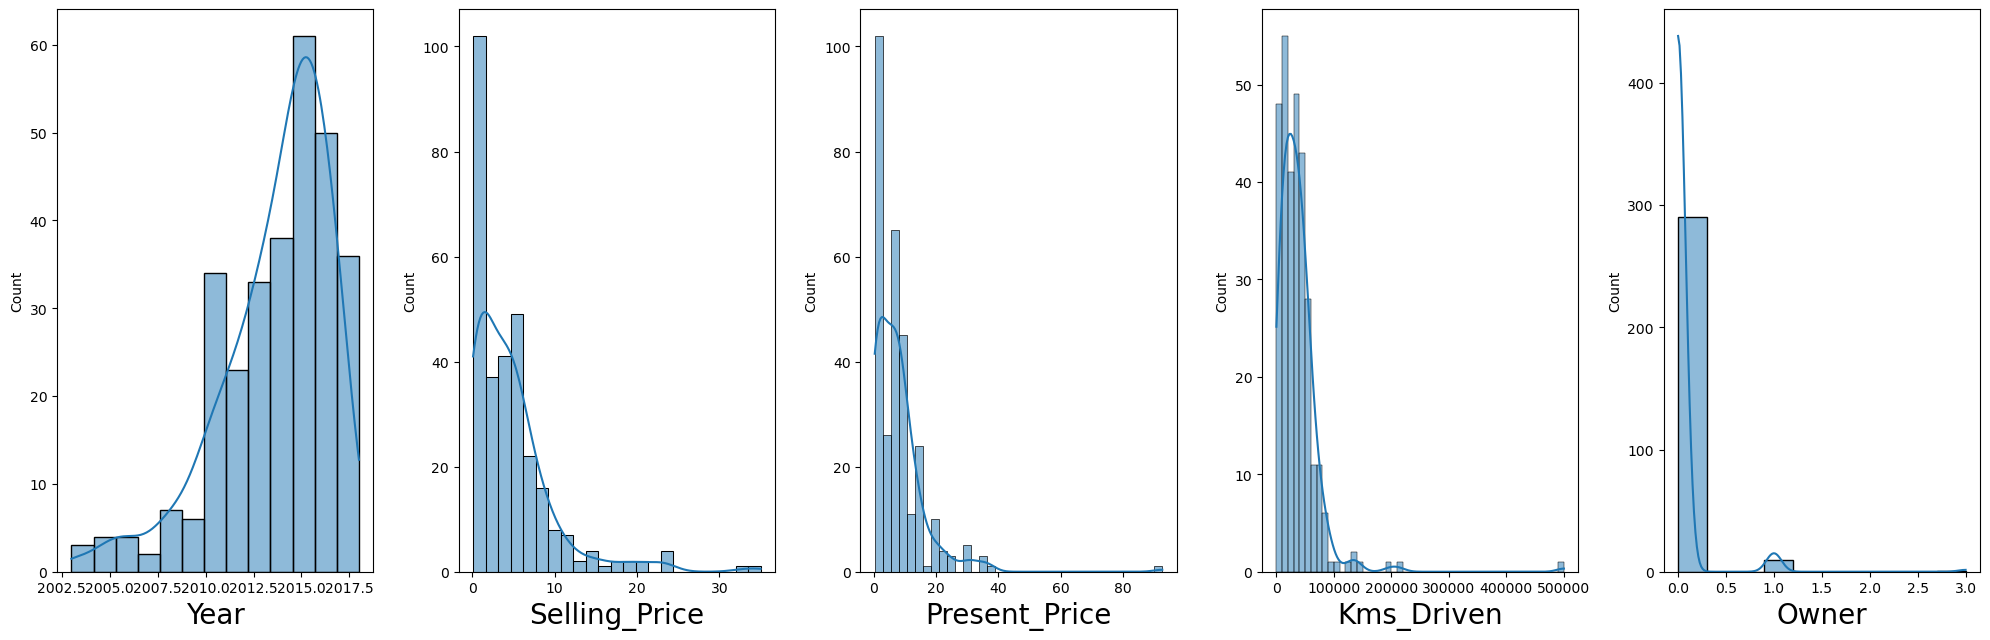

In [115]:
# let's see how numerical_features is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_features:
    if plotnumber<=5 :
        ax = plt.subplot(4,5,plotnumber)
        sns.histplot(data[column],kde = True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

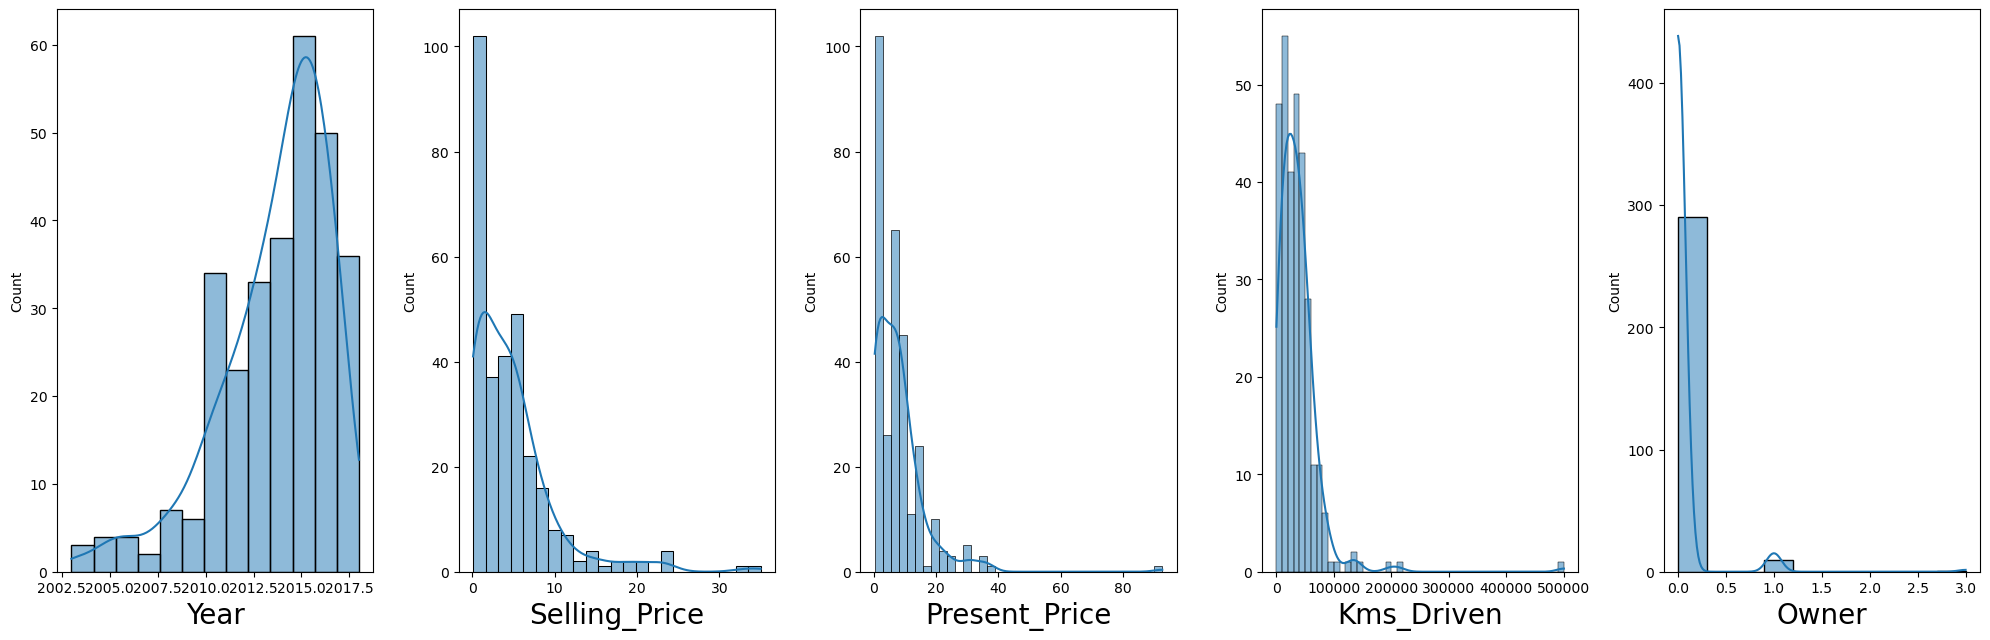

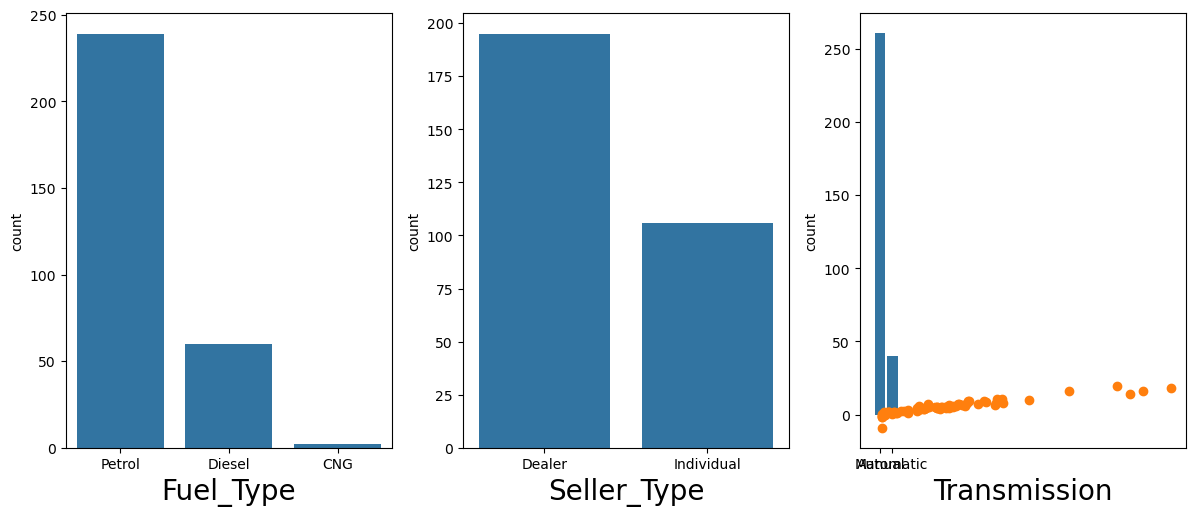

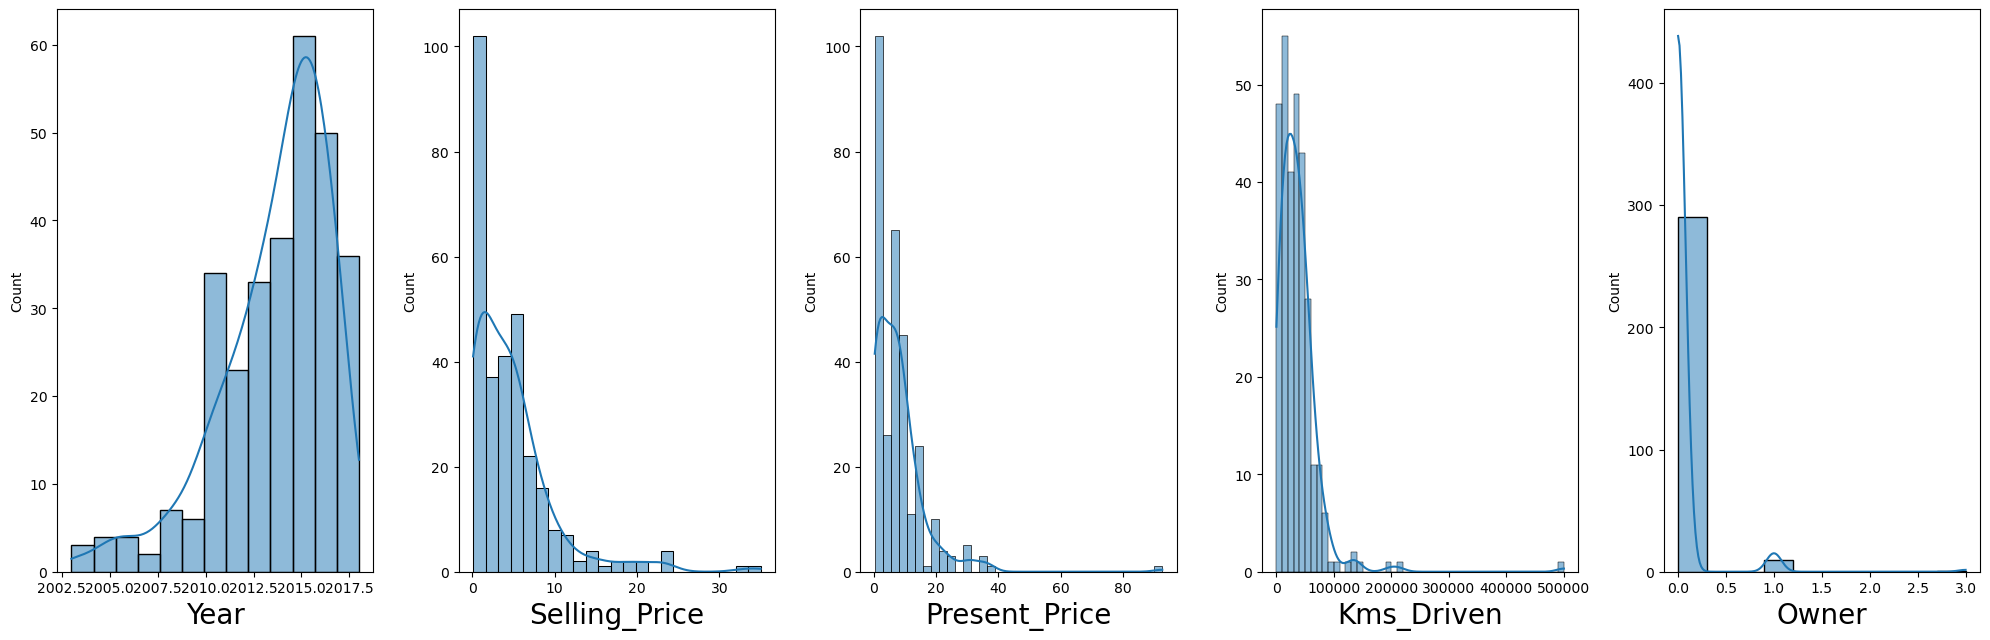

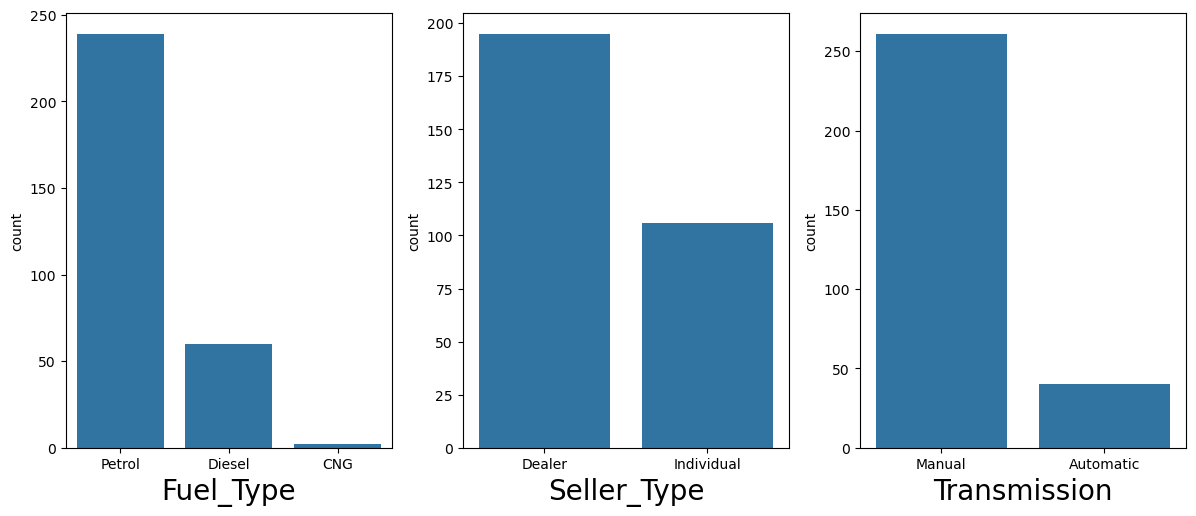

In [116]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Categorical_features:
    if plotnumber<=3 :
        ax = plt.subplot(5,5,plotnumber)
        sns.countplot(x = column,data = data)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Handling Categorical variables with More than Two Categories

Let's create a new column for Fuel_Type , Seller_Type , Transmission Columns.

We need to represent the 'Fuel_Type' , 'Seller_Type' , 'Transmission' column numerically Hence, for that we’ll create another dummy variable:

In [118]:
data = pd.get_dummies(data)


What does the encoding say?

1) For "Fuel_Type" Column 

    CNG is encoded as Fuel_Type_CNG = 1 , Fuel_Type_Diesel = 0 & Fuel_Type_Petrol = 0
    
    Diesel is encoded as Fuel_Type_CNG = 0 , Fuel_Type_Diesel = 1 and Fuel_Type_Petrol = 0

    Petrol is encoded as Fuel_Type_CNG = 0 , Fuel_Type_Diesel = 0 and Fuel_Type_Petrol = 1

2) For "Seller" Column

    Dealer is encoded as Seller_Type_Dealer = 1 & Seller_Type_Individual = 0
    
    Individual is encoded as Seller_Type_Dealer = 0 & Seller_Type_Individual = 1

3) For "Transmission" Column

    Automatic is encoded as Transmission_Automatic = 1 & Transmission_Manual = 0
    
    Individual is encoded as Transmission_Automatic = 0 & Transmission_Manual = 1
     

In [119]:
data.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,False,True,False,True,False,False,True


Now the question is: Why have we used two/one dummy columns instead of three/Two?

Because using only two dummy columns, we can capture the information of all the 3 columns. For example, if the value for Fuel_Type_Diesel as well as Fuel_Type_Petrol is 0, it automatically means that the data belongs to Fuel_Type_CNG.
This is called handling the dummy variable trap. If there are N dummy variable columns, then the same information can be conveyed by N-1 columns. Let's include the two new dummy variables in the model:

In [120]:
# create X(Independent data) and y(dependent data)
feature = ["Year","Present_Price","Kms_Driven","Owner","Fuel_Type_CNG","Fuel_Type_Diesel","Seller_Type_Dealer","Transmission_Automatic"]


In [121]:
X = data[feature]


In [122]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Automatic
0,2014,5.59,27000,0,False,False,True,False
1,2013,9.54,43000,0,False,True,True,False
2,2017,9.85,6900,0,False,False,True,False
3,2011,4.15,5200,0,False,False,True,False
4,2014,6.87,42450,0,False,True,True,False


In [124]:
y = data.Selling_Price    #this is the output variable

In [125]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Divide The Dataset into train and test data

In [126]:
!pip install scikit-learn

In [127]:
from sklearn.model_selection import train_test_split


In [128]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=5)

In [129]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((225, 8), (225,), (76, 8), (76,))

### Implementation of LinearRegression Model

In [130]:
from sklearn.linear_model import LinearRegression


In [131]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [132]:
prediction = lr.predict(x_test)

In [137]:

prediction


array([10.78421144, 10.95112468,  4.43422889,  6.04535164,  2.57202794,
        9.1338238 ,  7.24330305,  1.50656647, 16.04677278,  4.7450578 ,
        6.84008313,  6.3857336 ,  3.477431  ,  3.56076593, -0.57494497,
        4.18519916,  9.04177316, -0.27113047,  9.13473208,  1.20449498,
        7.46326947, 18.19681713, 19.52891292,  0.2380589 ,  2.17897109,
        4.76573255,  4.95395411,  6.80644562,  5.23204333,  5.46788519,
        4.36968896,  7.90005119,  5.74736324, -0.46784049,  0.68610858,
        7.12867273,  7.36186828,  5.41955025,  1.19155981,  1.21938827,
        2.07121458,  5.15047027, 13.94458027, -9.18072563,  1.40851856,
        4.02747881, -0.83723581,  8.55087047,  4.35286408,  4.84058685,
        5.19182941, 16.41985052,  0.89186356,  1.66282854,  1.65728181,
       -1.33878587,  2.88185614,  0.68410052, -1.70556136,  1.62452631,
        0.70724975,  2.90462069,  8.07723989, 10.15902756,  1.85526352,
        8.07954838,  0.83701906,  4.36496975,  2.42716646,  5.53

In [134]:
print(y_test)

67     9.25
99     9.65
266    3.65
222    6.00
24     2.90
       ... 
233    3.90
195    0.18
287    5.75
290    4.50
6      6.75
Name: Selling_Price, Length: 76, dtype: float64


In [135]:
lr.score(x_train,y_train) ## training score

0.8799908666232629

In [136]:
lr.score(x_test,y_test) ## test score

0.8608525898501929

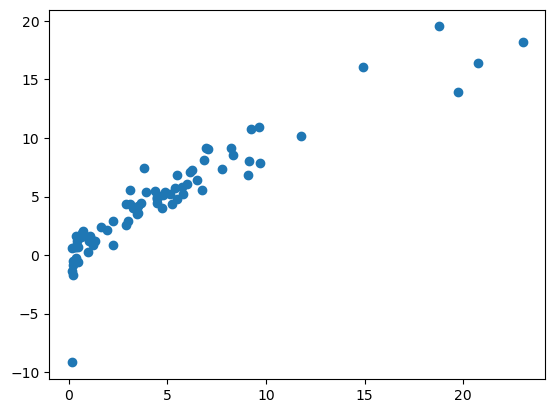

In [138]:
plt.scatter(y_test,prediction) ## plot y_test v/s prediction value of model
plt.show()

### Evolution Metrics of model

In [139]:
from sklearn import metrics

In [141]:
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MSE :  3.281596341651641
RMSE :  1.8115176901293681
R squared :  0.8608525898501929


### Implementation of Regularization Model

### 1) LASSO (L1-Norm) 

In [30]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Run LassoCV without the 'normalize' parameter
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)
lassocv.fit(x_train_scaled, y_train)

LassoCV(cv=10, max_iter=100000)

In [32]:
# best alpha parameter
alpha = lassocv.alpha_
alpha

0.316913841528142

In [33]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.316913841528142)

In [34]:
prediction = lasso_reg.predict(x_test)

In [35]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MAE :  1.2691894483416744
MSE :  3.5831730002256443
RMSE :  1.8929270984973627
R squared :  0.8480650295797286


### 2) Ridge(L2-Norm)

In [36]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Make sure features are scaled
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create alpha values
alphas = np.random.uniform(low=0, high=10, size=(50,))

# Fit RidgeCV without the 'normalize' parameter
ridgecv = RidgeCV(alphas=alphas, cv=10)
ridgecv.fit(x_train_scaled, y_train)

RidgeCV(alphas=array([4.82691781, 5.27098942, 3.99395399, 8.68737354, 7.08832256,
       7.0291914 , 4.58424067, 4.0035124 , 6.0995338 , 6.48162653,
       6.13187837, 1.17132986, 6.57927868, 6.96642113, 4.15128362,
       9.08063345, 7.99663927, 9.81907893, 6.30128875, 6.83263546,
       9.48737028, 6.59547132, 4.37999129, 8.51495659, 7.25766768,
       9.5988074 , 3.89091118, 8.31887101, 9.06272972, 6.95688541,
       0.60669069, 1.19898279, 1.95262807, 0.02557164, 5.10182291,
       5.5264508 , 8.84284675, 5.43807727, 6.58856321, 2.21656249,
       6.85388505, 0.04467595, 2.05440355, 2.14904655, 6.48435977,
       7.75610803, 4.33462194, 0.80906391, 6.73651053, 7.65520024]),
        cv=10)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

RidgeCV(alphas=array([1.13745832, 4.42856359, 2.79723047, 2.36539793, 3.14268178,
       9.0461971 , 0.35081927, 1.90800086, 7.74164852, 3.08079072,
       2.26240805, 6.92448899, 6.67305842, 5.80399605, 2.6445257 ,
       4.06298199, 7.75273057, 3.73577499, 2.70359755, 6.11345949,
       3.2148337 , 7.01541897, 6.92508952, 6.38294932, 7.35528   ,
       4.15114472, 0.45677018, 8.2812929 , 2.46410981, 4.88593256,
       3.86847723, 5.27877231, 2.91602504, 4.38011684, 3.36159409,
       8.30381805, 0.27668979, 2.46232487, 4.3108951 , 1.23610141,
       8.07985649, 2.49094706, 7.00931386, 3.23239857, 7.30448885,
       2.6940789 , 5.30943179, 2.67729028, 6.24721569, 9.56791329]),
        cv=10, normalize=True)

In [37]:
ridgecv.alpha_

9.819078933644063

In [38]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=9.819078933644063)

In [39]:
prediction = ridge_model.predict(x_test)

In [40]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MAE :  1.1232864988650575
MSE :  3.2053131721426715
RMSE :  1.7903388428291085
R squared :  0.8640871758169268


### 3) Elastic Net

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

# Scale features manually
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Run ElasticNetCV without 'normalize'
elasticCV = ElasticNetCV(alphas=None, cv=10, max_iter=100000)
elasticCV.fit(x_train_scaled, y_train)

ElasticNetCV(cv=10, max_iter=100000)

In [42]:
elasticCV.alpha_

0.16835019654592004

In [43]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal preference to L1 and L2
elasticCV.l1_ratio

0.5

In [44]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.16835019654592004)

In [45]:
prediction = elasticnet_reg.predict(x_test)

In [46]:
print('MAE : ',metrics.mean_absolute_error(y_test,prediction))
print('MSE : ',metrics.mean_squared_error(y_test,prediction))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared : ',metrics.r2_score(y_test,prediction))

MAE :  1.168595799009746
MSE :  3.469379195012833
RMSE :  1.8626269607768575
R squared :  0.852890154804754


### Prediction

In [47]:
import pandas as pd

# Replace with your custom values
input_dict = {
    "Year": 2016,
    "Present_Price": 7.5,
    "Kms_Driven": 50000,
    "Owner": 0,
    "Fuel_Type_CNG": 0,
    "Fuel_Type_Diesel": 1,
    "Seller_Type_Dealer": 1,
    "Transmission_Automatic": 0
}

# Create DataFrame from dict
input_df = pd.DataFrame([input_dict])

# Predict
predicted_value = lr.predict(input_df)

# Print formatted result
print("Predicted value: ₹{:.2f} lakhs".format(predicted_value[0]))

Predicted value: ₹7.15 lakhs
